In [567]:
import pandas as pd 
from sklearn.linear_model import LinearRegression
from datetime import datetime, date
import numpy as np 

userStock = input("Enter a ticker symbol: ")

stock_data = pd.read_csv("dow_jones_index/dow_jones_index.csv", parse_dates=["date"])
stock_data["day_of_year"] = stock_data["date"].dt.dayofyear
stock_data["close"] = stock_data["close"].str[1:]
stock_data["close"] = stock_data["close"].astype('float')


In [568]:
training_data = stock_data[stock_data["stock"] == userStock][0:19]
testing_data = stock_data[stock_data["stock"] == userStock][20:25]

X_train = training_data[["day_of_year"]]
y_train = training_data["close"]
X_test = testing_data[["day_of_year"]]

<AxesSubplot:xlabel='day_of_year', ylabel='close'>

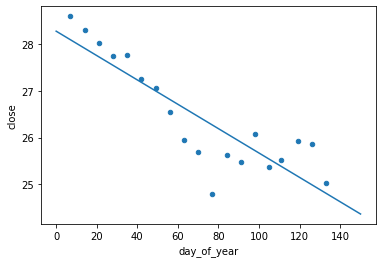

In [569]:
stockModel = LinearRegression()
stockModel.fit(
    X=X_train,
    y=y_train
)
stockModel.predict(
    X=X_test
)

X_new_stock = pd.DataFrame()
X_new_stock["day_of_year"]= np.linspace(0,150, num=7)

y_new_stock = pd.Series(
    stockModel.predict(X_new_stock),
    index=X_new_stock["day_of_year"]
)

training_data.plot.scatter(x="day_of_year", y="close")
y_new_stock.plot.line()

In [570]:
print("The slope of the linear regression is: " , stockModel.coef_[0])
print("The intercept of the linear regession is: ", stockModel.intercept_)

The slope of the linear regression is:  -0.02613955606964383
The intercept of the linear regession is:  28.281551053502984


In [571]:
stockModel2 = LinearRegression()

stockModel2.fit(
    X=training_data[["day_of_year"]],
    y=training_data["close"]
)

# userDate = input("Enter a date that you want to see the price of ") # 06/26/2011

# print(userDate)
# userDate_day_of_year = date(int(userDate[6:]), int(userDate[0:2]), int(userDate[3:5]))
# print(userDate_day_of_year.timetuple().tm_yday)



# stock_predict = pd.DataFrame({"day_of_year": [userDate_day_of_year.timetuple().tm_yday]})
# ans = stockModel2.predict(
#     X=stock_predict[["day_of_year"]]
# )

# print(ans[0])

LinearRegression()

In [572]:
# Pearson Test: Figure out which stock is growing the fastest during the two quarters 
from scipy.stats import pearsonr

stockNames = stock_data.stock.unique()

totalCorr = 0
maxCorr = 0
minCorr = float("inf")
stockNameMax = ""
stockNameMin = ""
for x in stockNames:
    stockName = stock_data[stock_data["stock"] == x]
    corr, _ = pearsonr(stockName["day_of_year"], stockName["close"])
    totalCorr += corr
    if(corr > maxCorr):
        maxCorr = corr
        stockNameMax = x
    if(corr < minCorr):
        minCorr = corr
        stockNameMin = x

print("The average correlation during the 2011 in the DOW Jones Index is ", totalCorr / 30)
print("The highest correlation was", stockNameMax, "at a correlation of ", maxCorr)
print("The lowest correlation was", stockNameMin, "at a correlation of ", minCorr)


The average correlation during the 2011 in the DOW Jones Index is  0.16248216400042945
The highest correlation was MCD at a correlation of  0.8929307800638213
The lowest correlation was BAC at a correlation of  -0.9416455315852489


Mean Absolute Error (MAE) for MSFT : 1.3889516231009271


<AxesSubplot:xlabel='day_of_year', ylabel='Close'>

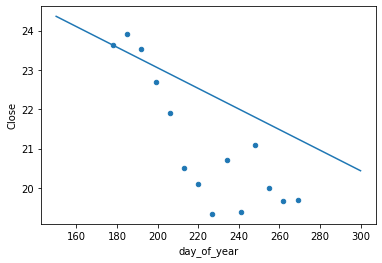

In [573]:
# Add three or four stocks at quarter 3 of 2011. Compute the predicted prize of the stock with our model and compare with the actual
# value. 


file_name = "stockData/" + userStock + "q3" + ".csv"
stock_data = pd.read_csv(file_name, parse_dates=["Date"])
stock_data["day_of_year"] = stock_data["Date"].dt.dayofyear
predicted_array = []
for doy in stock_data.day_of_year:
    stock_predict = pd.DataFrame({"day_of_year": [doy]})
    predictedClose = stockModel2.predict(
        X = stock_predict[["day_of_year"]]
    )
    predicted_array.append(predictedClose[0])
    loss_total = 0
    for i in range(0, len(predicted_array)):
        loss_total += abs(predicted_array[i] - stock_data.Close[i])
print("Mean Absolute Error (MAE) for", userStock , ":", loss_total / len(predicted_array))

X_stock = pd.DataFrame()
X_stock["day_of_year"]= np.linspace(150, 300, num=7)
y_stock = pd.Series(
    stockModel.predict(X_stock),
    index=X_stock["day_of_year"]
)

stock_data.plot.scatter(x = "day_of_year", y = "Close")
y_stock.plot.line()



Mean Absolute Error (MAE) for MSFT : 10.53928916125914


<AxesSubplot:xlabel='day_of_year', ylabel='Close'>

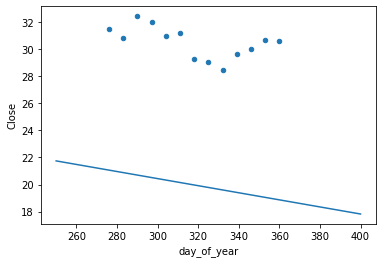

In [574]:
# Add three or four stocks at quarter 2 of 2012. Compute the predicted prize of the stock with our model and compare with the actual
# value. 


file_name = "stockData/" + userStock + "q2" + ".csv"
stock_data = pd.read_csv(file_name, parse_dates=["Date"])
stock_data["day_of_year"] = stock_data["Date"].dt.dayofyear + 183
predicted_array = []
for doy in stock_data.day_of_year:
    stock_predict = pd.DataFrame({"day_of_year": [doy]})
    predictedClose = stockModel2.predict(
        X = stock_predict[["day_of_year"]]
    )
    predicted_array.append(predictedClose[0])
    loss_total = 0
    for i in range(0, len(predicted_array)):
        loss_total += abs(predicted_array[i] - stock_data.Close[i])
print("Mean Absolute Error (MAE) for", userStock , ":", loss_total / len(predicted_array))

X_stock = pd.DataFrame()
X_stock["day_of_year"]= np.linspace(250, 400, num=7)
y_stock = pd.Series(
    stockModel.predict(X_stock),
    index=X_stock["day_of_year"]
)

stock_data.plot.scatter(x = "day_of_year", y = "Close")
y_stock.plot.line()